# **Visualización de datos con Matplotlib**

## El primer paso y el primer gráfico

In [ ]:
pip install matplotlib=='3.5.2'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.6 MB/s 
     |████████████████████████████████| 944 kB 36.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install numpy=='1.21.6'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas=='1.3.5'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt # Gráficos
import numpy as np # Operaciones

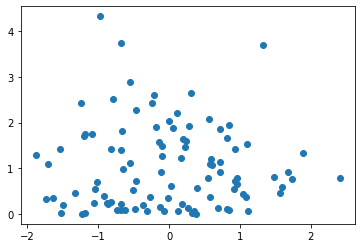

In [ ]:
fig, ax = plt.subplots() # Figura con un solo conjunto de ejes (x e y)
ax.scatter(np.random.randn(100), np.random.exponential(size = 100)) # Dibujado del gráfico

## Anatomía de un gráfico

<img src="https://matplotlib.org/stable/_images/anatomy.png" width="600"/>

El elemento principal de un gráfico son las figuras y ejes.

In [ ]:
fig = plt.figure() # Figura sin ejes (se añaden los ejes a mano)
fig

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

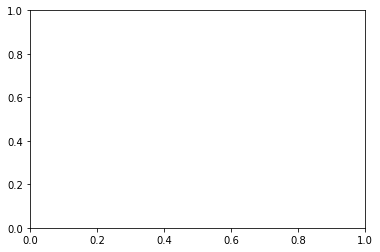

In [ ]:
fig, ax = plt.subplots() # Figura con un solo conjunto de ejes
ax

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

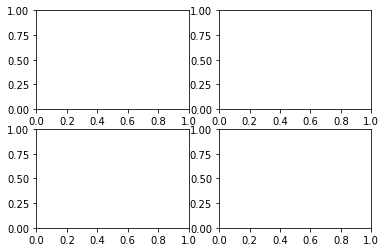

In [ ]:
fig, axs = plt.subplots(2,2) # Figura con 2 filas y 2 columnas de gráficos (con sus propios ejes)
axs

Cada conjunto de ejes se conoce como un **artist** y corresponde a la región sobre la cual graficamos. 

+ Cada uno suele incluir dos objetos de tipo **axis** (3 en el caso de gráficos tridimensionales).
+ A estos cuales se les puede modificar los **ticks** y **tick labels** (para cambiar escalas).
+ Además se les puede colocar un título (**set_title()**), y títulos de los ejes (**set_xlabel()**, **set_ylabel()**).

Todos los demás objetos visibles en una figura también son **artists** y usualmente están atados a los ejes. Estos incluyen textos (**Text**), líneas (**Line2D**), etc.

## Tipos de inputs

Las funciones de dibujado de matplotlib siempre requerirán objetos del tipo **numpy.array**, **numpy.ma.masked_array** o que puedan ser transformados a tales (como objetos **numpy.matrix** o **pandas**).

Además se pueden usar objetos como diccionarios (**dict**) a través del argumento **data**.

In [ ]:
# Datos
data = {'var_a': np.arange(50),
        'var_c': np.random.randint(0, 50, 50),
        'var_d': np.abs(np.random.randn(50)) * 100}
data['var_b'] = data['var_a']+ (10 * np.random.randn(50))

Text(0, 0.5, 'Variable B')

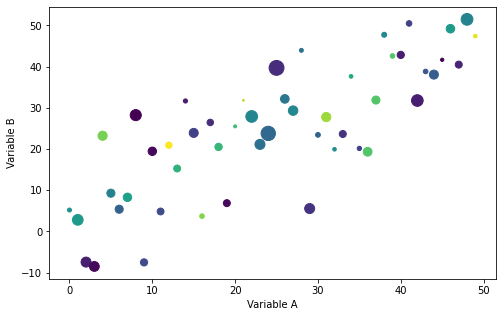

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter('var_a', 'var_b', c='var_c', s='var_d', data = data)
ax.set_xlabel('Variable A')
ax.set_ylabel('Variable B')

Text(0, 0.5, 'Variable B')

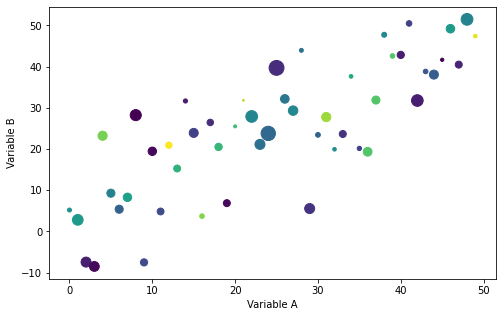

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(data['var_a'], data['var_b'], c=data['var_c'], s=data['var_d'])
ax.set_xlabel('Variable A')
ax.set_ylabel('Variable B')

## Formas de crear el gráfico

Existen dos formas principales de crear un gráfico con matplotlib:

+ Crear **explícitamente** las figuras y ejes (**fig**, **axes**) y llamar los métodos sobre ellas (estilo orientado a objetos - OO).
+ Confiar en que pyplot **se encargue de todo automáticamente**.

El estilo OO es aplicable en gráficos complejos, mientras que el estilo pyplot es buena para gráficos rápidos.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


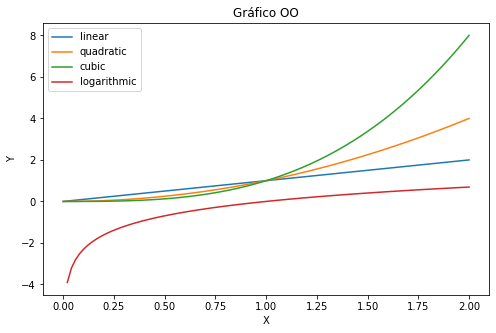

In [ ]:
# Estilo OO
x = np.linspace(0, 2, 100)  # Datos de ejemplo
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, x, label='linear')  # Función lineal
ax.plot(x, x**2, label='quadratic')  # Función cuadrática
ax.plot(x, x**3, label='cubic')  # Función cúbica
ax.plot(x, np.log(x), label='logarithmic')  # Función logarítmica
ax.set_xlabel('X') 
ax.set_ylabel('Y')
ax.set_title("Gráfico OO")  # Título Gráfico
ax.legend()  # Leyenda

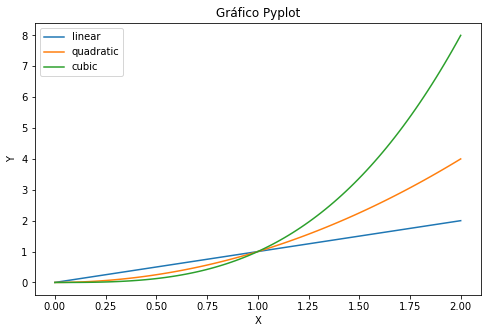

In [ ]:
# Estilo Pyplot
plt.figure(figsize=(8, 5))
plt.plot(x, x, label='linear') # Gráfico implícito
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Gráfico Pyplot")
plt.legend()

## Funciones de ayuda de graficado

Si necesitamos hacer el mismo gráfico una y otra vez con distintos datos, se puede utilizar la siguiente función.

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    out = ax.scatter(data1, data2, **param_dict)
    return out

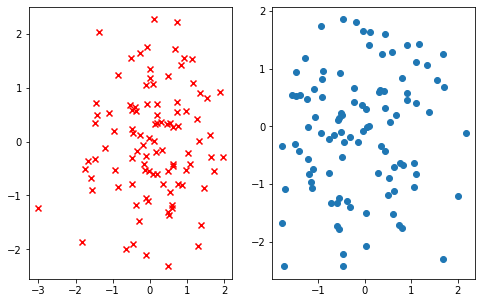

In [ ]:
# Ejemplo
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
my_plotter(ax1, data1, data2, {'marker': 'x', 'c':'red'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

## Darle estilo a los artists

La mayoría de métodos de graficado tienen opciones de estilo para los artistas a través de **argumentos** en el llamado de la función o a través de un **setter**.

In [ ]:
# Datos
x = np.arange(100)
v = np.random.randn(100)
w = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

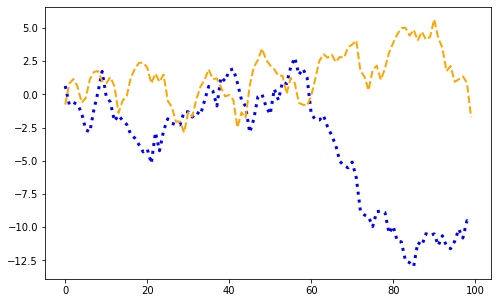

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize=(8, 5))
l1, = ax.plot(x, np.cumsum(y), color = 'blue', linewidth = 3)
l1.set_linestyle(':')
l2, = ax.plot(x, np.cumsum(z), color = 'orange', linewidth = 2, linestyle = '--')

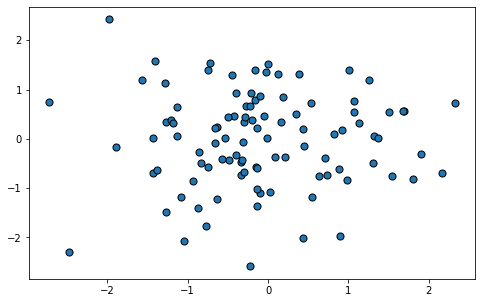

In [ ]:
# Color (https://matplotlib.org/stable/tutorials/colors/colors.html)
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(y, z, s=50, facecolor='C0', edgecolor='k')

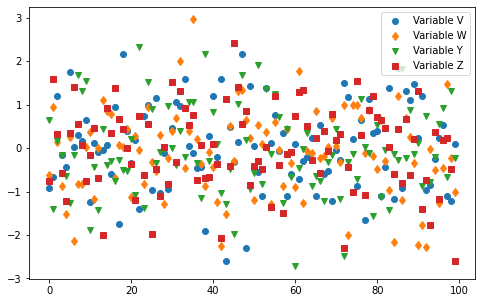

In [ ]:
# Ancho y estilo de línea, markers (https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)
fig, ax = plt.subplots(figsize=(8,5))
p1, = ax.plot(v, 'o', label = 'Variable V')
p2, = ax.plot(w, 'd', label = 'Variable W')
p3, = ax.plot(y, 'v', label = 'Variable Y')
p4, = ax.plot(z, 's', label = 'Variable Z')
ax.legend(handles = [p1, p2, p3, p4], loc = 'upper right')

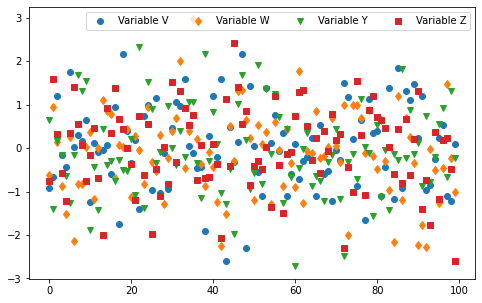

In [ ]:
# Leyenda horizontal
fig, ax = plt.subplots(figsize=(8,5))
p1, = ax.plot(v, 'o', label = 'Variable V')
p2, = ax.plot(w, 'd', label = 'Variable W')
p3, = ax.plot(y, 'v', label = 'Variable Y')
p4, = ax.plot(z, 's', label = 'Variable Z')
ax.legend(handles = [p1, p2, p3, p4], loc = 'upper right', ncol = 4)

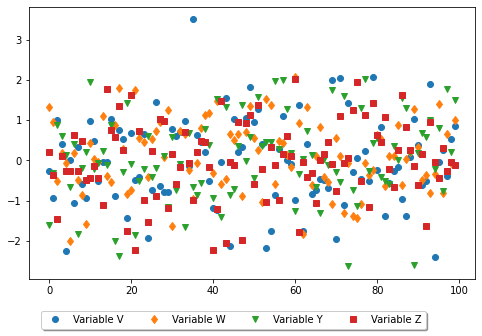

In [ ]:
# Leyenda fuera
fig, ax = plt.subplots(figsize=(8,5))
p1, = ax.plot(v, 'o', label = 'Variable V')
p2, = ax.plot(w, 'd', label = 'Variable W')
p3, = ax.plot(y, 'v', label = 'Variable Y')
p4, = ax.plot(z, 's', label = 'Variable Z')
ax.legend(handles = [p1, p2, p3, p4], loc = 'upper right', ncol = 4,
          bbox_to_anchor=(0.9, -0.1), shadow = True)

## Colocar etiquetas sobre los gráficos

Ya hemos visto como colocar títulos generales y de ejes. Todos estos son de tipo **text** y son editables con **argumentos** en su llamada. Además podemos llamar otro tipo de textos (e incluso textos matemáticos). 

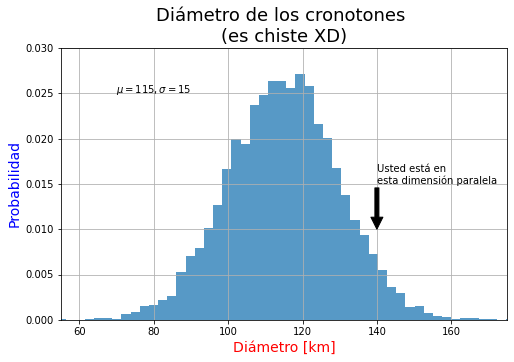

In [ ]:
# Datos
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
# Gráfico
fig, ax = plt.subplots(figsize=(8,5))
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha = 0.75)
# Características
ax.set_xlabel('Diámetro [km]', color = 'red', fontsize = 14)
ax.set_ylabel('Probabilidad', color = 'blue', fontsize = 14)
ax.set_title('Diámetro de los cronotones \n(es chiste XD)', fontsize = 18)
# Texto con latex (ecuación)
ax.text(70, 0.025, r'$\mu = 115, \sigma = 15$')
# Anotaciones con flecha
ax.annotate('Usted está en \nesta dimensión paralela',
            xy = (140, 0.01), xytext = (140, 0.015),
            arrowprops=dict(facecolor='black'))
# Límites de los ejes
ax.axis([55, 175, 0, 0.03])
# Cuadrícula
ax.grid(True)

## Escalas y marcas de ejes

En cada eje podemos controlar la escala (**scale**) y las localizaciones (**locators**) y formato (**formatters**) de sus etiquetas (**ticks**).

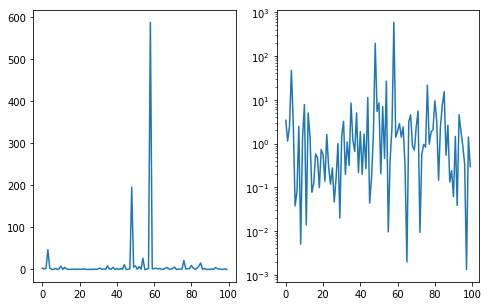

In [ ]:
# Escala
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
x = np.arange(100)
y = 10**np.random.randn(100)
axs[0].plot(x, y)
axs[1].plot(x, y)
axs[1].set_yscale('log')

Text(0.5, 1.0, 'Ticks manuales')

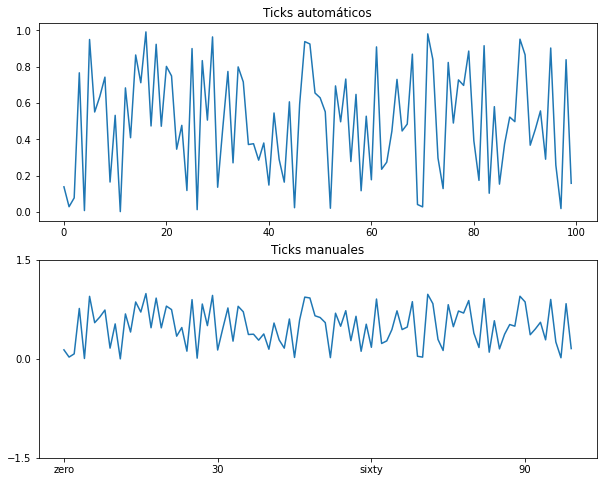

In [ ]:
# Ticks
x = np.arange(100)
y = np.random.rand(100)
fig, axs = plt.subplots(2, 1, figsize =(10,8))
axs[0].plot(x, y)
axs[0].set_title('Ticks automáticos')
axs[1].plot(x, y) 
# Ticks manuales
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
# Ticks específicos
axs[1].set_yticks([-1.5,0,1.5])
axs[1].set_title('Ticks manuales')

## Gráfico de fechas y textos

In [ ]:
# Rango de fechas
fechas = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                   np.timedelta64(1, 'h'))
# Datos
x = np.cumsum(np.random.randn(len(fechas)))

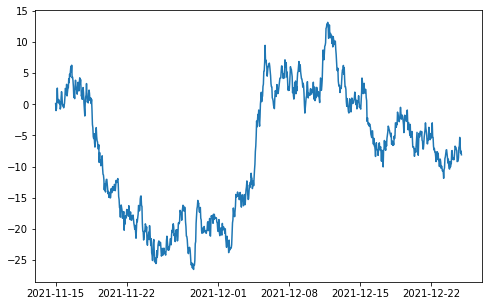

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fechas, x)

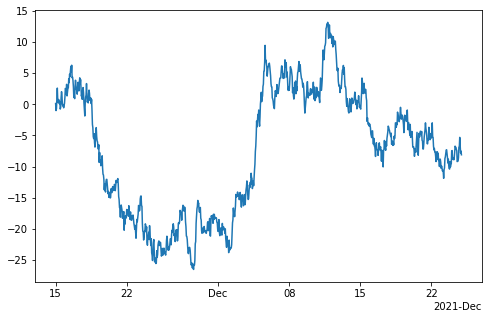

In [ ]:
# Con formato de fechas conciso (https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html#sphx-glr-gallery-text-labels-and-annotations-date-py)
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(fechas, x)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

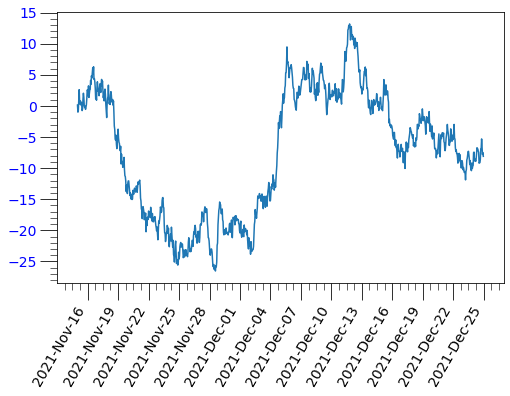

In [ ]:
# Con formato manual
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(fechas, x)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%b-%d'))
# Otras opciones
for label in ax.get_xticklabels():
  label.set(rotation = 60, horizontalalignment='right', size=14)
for label in ax.get_yticklabels():
  label.set(size=14, color = 'blue')
ax.tick_params(which = 'major', length = 17)
ax.minorticks_on()
ax.tick_params(which = 'minor', length = 7)
ax.xaxis.set_major_locator(mpl.dates.DayLocator(interval=3))

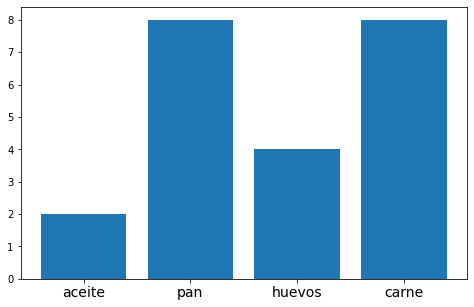

In [ ]:
# Barras con eje de texto
fig, ax = plt.subplots(figsize=(8,5))
categorias = ['aceite', 'pan', 'huevos', 'carne']
ax.bar(categorias, np.random.randint(10, size = len(categorias)))
for label in ax.get_xticklabels(which='major'):
  label.set(horizontalalignment='center', size = 14)

## Objetos adicionales en los ejes

In [ ]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)

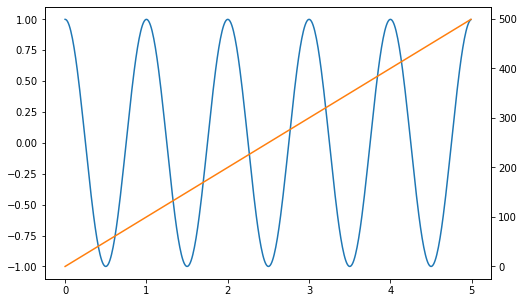

In [ ]:
# Eje Y secundario
fig, ax = plt.subplots(figsize = (8,5))
l1, = ax.plot(t, s)
ax2 = ax.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')

Text(0.5, 0, 'Ángulo [°]')

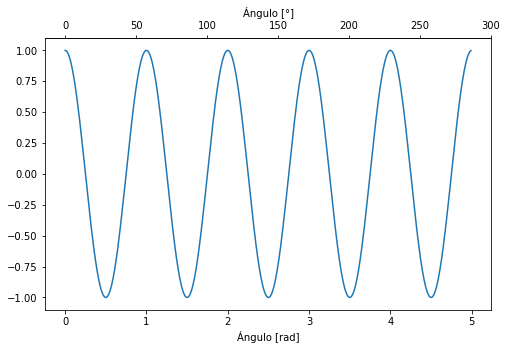

In [ ]:
# Eje X secundario
fig, ax = plt.subplots(figsize = (8, 5))
l1, = ax.plot(t, s)
ax.set_xlabel('Ángulo [rad]')
ax2 = ax.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax2.set_xlabel('Ángulo [°]')

## Mapas de color

In [ ]:
# Datos
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

In [ ]:
X.shape

(128, 128)

In [ ]:
Y.shape

(128, 128)

In [ ]:
Z.shape

(128, 128)

Text(0.5, 1.0, 'pcolormesh()')

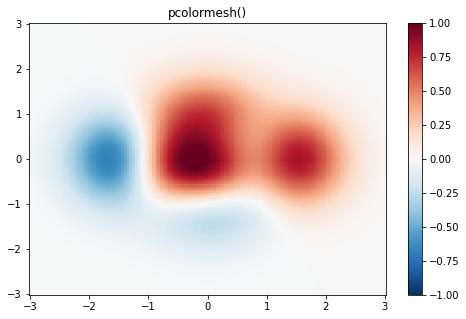

In [ ]:
# ColorMesh
fig, ax = plt.subplots(figsize = (8,5))
pc = ax.pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=ax)
ax.set_title('pcolormesh()')

Text(0.5, 1.0, 'contourf()')

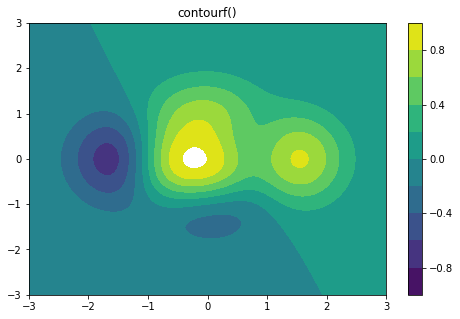

In [ ]:
# Contourf
fig, ax = plt.subplots(figsize = (8,5))
co = ax.contourf(X, Y, Z, levels=np.linspace(-1, 1, 11))
fig.colorbar(co, ax=ax)
ax.set_title('contourf()')

Text(0.5, 1.0, 'imshow()')

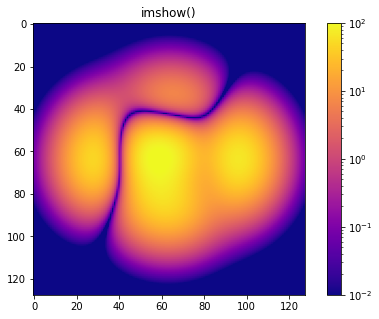

In [ ]:
# imshow
fig, ax = plt.subplots(figsize = (8,5))
im = ax.imshow(Z**2*100, cmap='plasma', norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(im, ax=ax)
ax.set_title('imshow()')

Text(0.5, 1.0, 'scatter()')

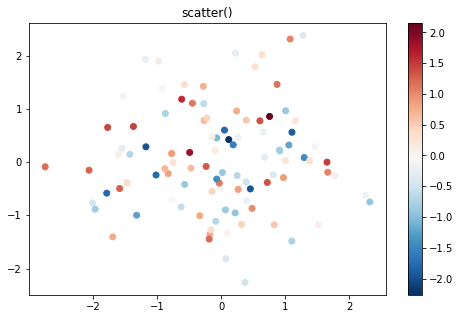

In [ ]:
# Scatter
dataX = np.random.randn(100)
dataY = np.random.randn(100)
dataZ = np.random.randn(100)
fig, ax = plt.subplots(figsize = (8,5))
sc = ax.scatter(dataX, dataY, c=dataZ, cmap='RdBu_r')
fig.colorbar(sc, ax=ax)
ax.set_title('scatter()')

## Varias figuras y ejes

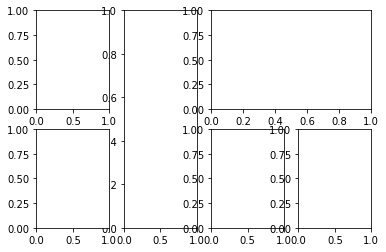

In [ ]:
# https://matplotlib.org/stable/tutorials/provisional/mosaic.html
axd = plt.subplot_mosaic([['A', 'B', 'D', 'D'], 
                          ['C', 'B', 'E', 'F']])

# Ejercicios

## Preparativos
+ Cargar pandas y colab 
+ Añadir la carpeta como acceso directo en su drive
+ Montar google drive
+ Cargar las bases al entorno con pandas

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import files

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/data/company_sales_data.csv')
gapminder = pd.read_csv('/content/drive/MyDrive/data/gapminder.csv')
gapminder = gapminder.drop(gapminder.columns[0], axis=1)

In [ ]:
sales.head()

month_number  facecream  facewash  toothpaste  bathingsoap  shampoo  \
0             1       2500      1500        5200         9200     1200   
1             2       2630      1200        5100         6100     2100   
2             3       2140      1340        4550         9550     3550   
3             4       3400      1130        5870         8870     1870   
4             5       3600      1740        4560         7760     1560   

   moisturizer  total_units  total_profit  
0         1500        21100        211000  
1         1200        18330        183300  
2         1340        22470        224700  
3         1130        22270        222700  
4         1740        20960        209600

In [ ]:
gapminder.head()

country  year  population continent  life_exp       gdp_cap
0  Afghanistan  2007    31889923      Asia    43.828    974.580338
1      Albania  2007     3600523    Europe    76.423   5937.029526
2      Algeria  2007    33333216    Africa    72.301   6223.367465
3       Angola  2007    12420476    Africa    42.731   4797.231267
4    Argentina  2007    40301927  Americas    75.320  12779.379640

## Ejercicio 1

+ Generar un gráfico de líneas con el **month_number** en el eje x y **total_profit** en el eje y.
+ El título del eje debe ser 'Ganancias mensuales de la compañía'.

Text(0.5, 1.0, 'Ganancias mensuales de la compañía')

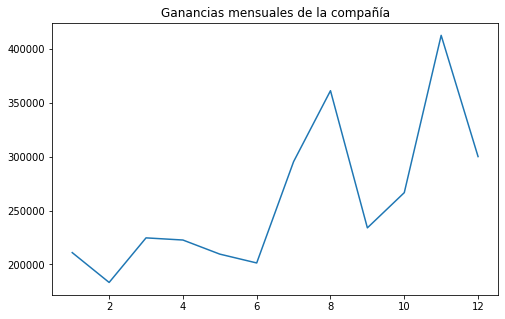

## Ejercicio 2
+ Generar el mismo gráfico anterior.
+ Mantener el título.
+ Cambiar el estilo de la línea a punteada y de color rojo, con ancho 3.
+ Añadir marcador de círculo negro.
+ Mostrar leyenda en la parte inferior derecha con el nombre 'Ganancias'.
+ Añadir títulos de eje: Mes, USD.

Text(0, 0.5, 'USD')

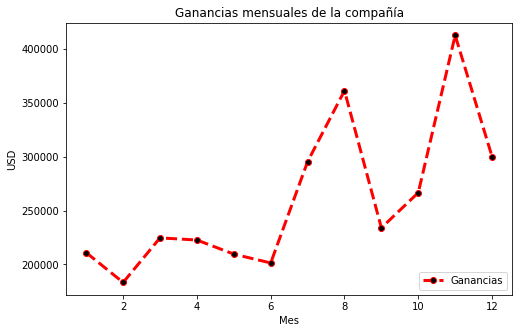

## Ejercicio 3
+ Graficar las series **facecream** a **moisturizer** (6 series) mensuales por separado, incluyendo una leyenda. 
+ Utilizar líneas de grosor 3 con marcador de X negro.
+ Colocar la leyenda en la parte superior izquierda.
+ Colocar título y nombre de ejes.
+ Extra: Colocar el producto con la primera mayúscula. 

Text(0, 0.5, '# de unidades')

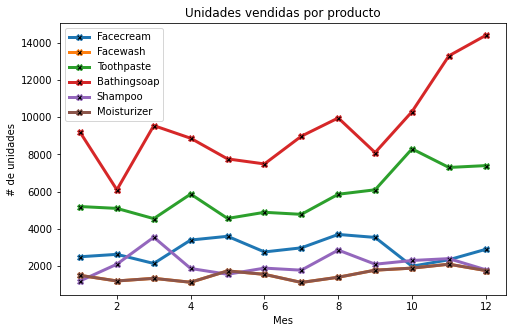

## Ejercicio 4
+ Graficar las ventas de toothpaste como un scatterplot.
+ Colocar una grilla a cuadros detrás del gráfico (ax.grid) con línea punteada y ancho 1.
+ De aquí en adelante se vuelve implícito colocar: título y nombre de ejes.

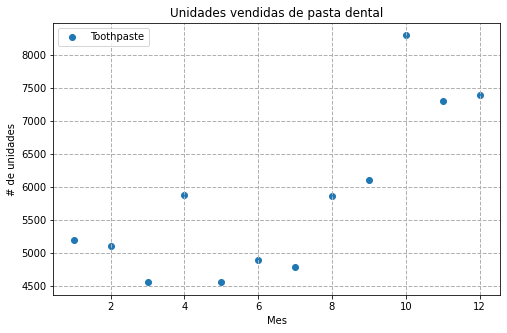

## Ejercicio 5
+ Graficar facecream y facewash como barras, por mes. Las barras deben estar una junto a la otra y ser de ancho 0.25 (el mes no va igual, debe ser modificado para que una barra esté a la izquierda y la otra a la derecha).
+ Personalizar los ticks de la leyenda para que se muestren los 12 meses.
+ Mantener la grilla del ejercicio anterior.

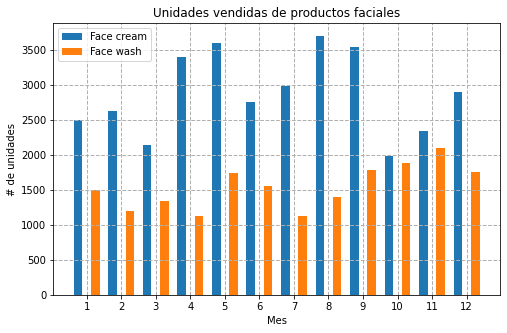

## Ejercicio 6

+ Mostrar los datos de bathingsoap como un gráfico de líneas y marcador circular, mostrando el eje en formato de fecha (para ello crear una nueva variable mes_fecha con el año 2021, utilizando funciones de texto y pd.to_datetime).
+ Mantener la grilla del ejercicio anterior.

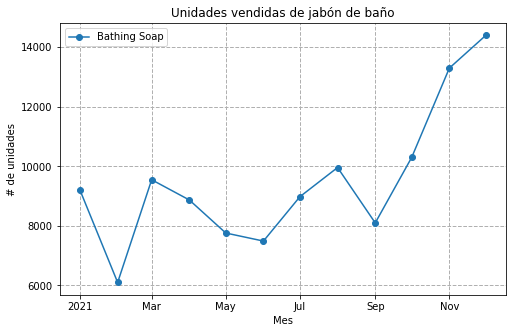

## Ejercicio 7
+ Crear un histograma de las ventas totales, utilizando 20 bins.
+ Extra: colocar etiquetas de miles de dólares ($3k).

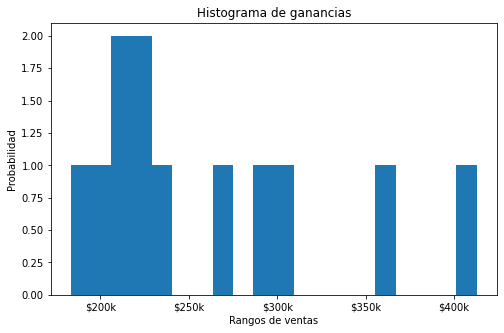

## Ejercicio 8
+ Crear dos gráficos dentro de la misma figura (2 filas y 1 columna), similares a los del ejercicio 6 (en miles de unidades), con los productos bathingsoap y facewash.
+ Las líneas deben ser de grosor 3 y de colores distintos.
+ Aumentar el tamaño de las etiquetas a conveniencia del lector.

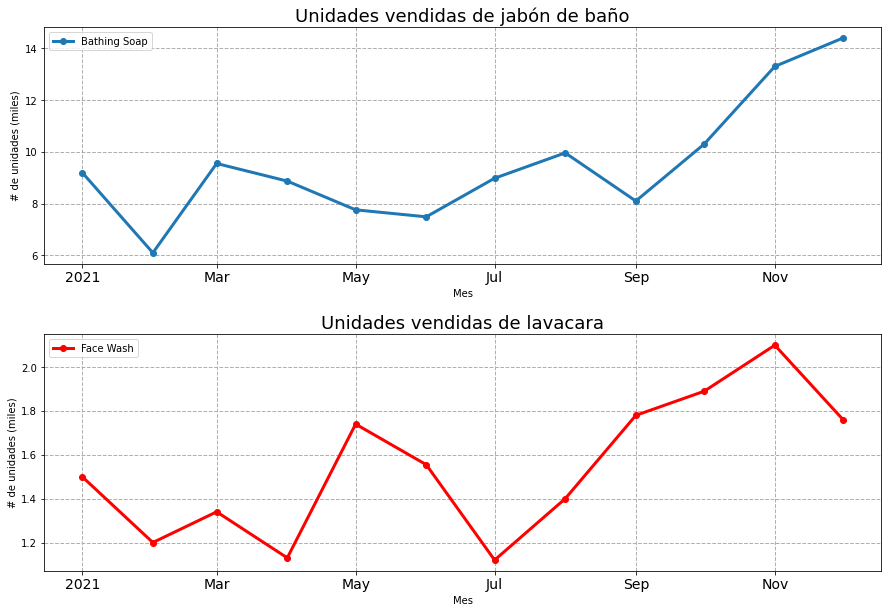

## Ejercicio 9
+ Cargue el dataset de gapminder.
+ Cree un diccionario de colores para los continentes.
+ Cree un scatterplot de gdp_cap vs life_exp. El tamaño de los marcadores responderá al tamaño de la población (dividida para un millón)
+ Coloque la leyenda de puntos, utilizando el argumento handles y la última parte de esta guía (https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html)
+ Deje el tamaño de los títulos de ejes en 16 y el general en 18.
+ El texto de las etiquetas de ejes será 14 y de la leyenda, 12.
+ El título debe estar en negrilla.

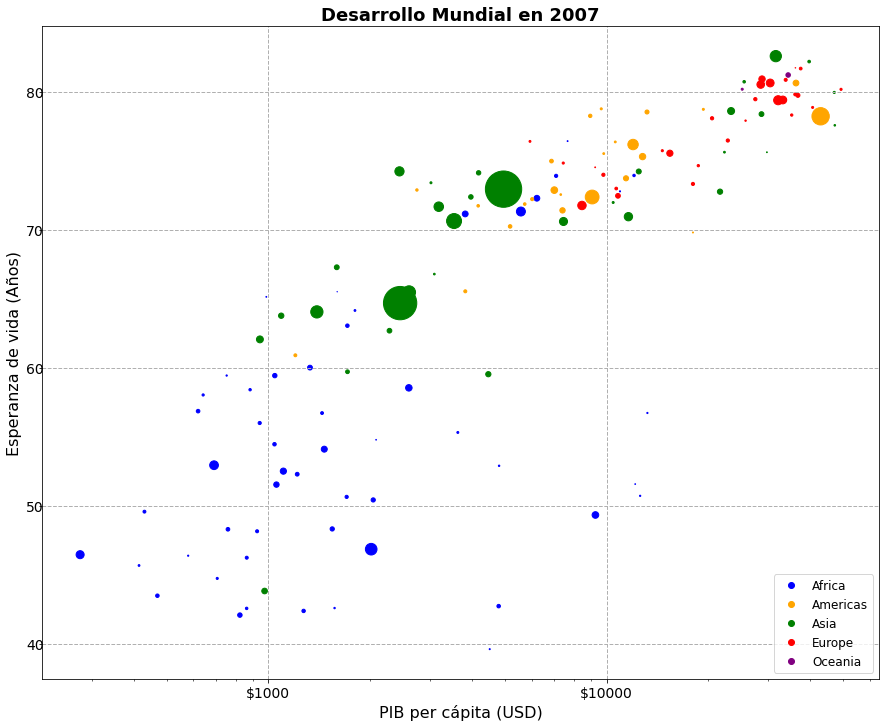

In [ ]:
fig, ax = plt.subplots(figsize=(15,12))
colors = {'Africa':'blue', 'Americas':'orange', 'Asia':'green', 'Europe':'red', 'Oceania':'purple'}
ax.scatter(gapminder['gdp_cap'], gapminder['life_exp'], c=gapminder['continent'].map(colors), s = gapminder['population']/1000000)
legend_items = [mpl.lines.Line2D([0], [0], marker = 'o', label = i, color = colors[i], linewidth=0) for i in colors.keys()]
ax.legend(handles = legend_items, loc = 'lower right', prop={'size': 12})
ax.set_xscale('log')
ax.xaxis.set_major_formatter('${x:1.0f}')
ax.set_xlabel('PIB per cápita (USD)', size = 16)
ax.set_ylabel('Esperanza de vida (Años)', size = 16)
ax.set_title('Desarrollo Mundial en 2007', size = 18, fontweight="bold")
ax.grid(True, linewidth = 1, linestyle = '--')
for label in ax.get_xticklabels(which='major'):
    label.set(horizontalalignment='center', size=14)
for label in ax.get_yticklabels(which='major'):
    label.set(horizontalalignment='center', size=14)